<a href="https://colab.research.google.com/github/rgiostri/X.ECFA.UFES.Blur.function/blob/master/Kernel_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description
===========

The deconvolution procedure of a signal or statistical distribution can be interpreted as a base change of representation of the signal. This mechanism caters to several specific interests and is called by many names depending on science that applies it. 

In signal processing it is usual to call a window the function that convolves with the signal in order to limit it. In multiscale analyzes is usual the name  tapering function, for the function that changes the scale . The statistics uses kernel function. Here we will use the window function, but  the main task of function is blur of the output of CLEAN.

In the context of this work, kernel  is a mathematical function that is zero-valued outside of some chosen interval.

Below we show examples of blur functions and their characteristics.  In the end we construct a two-dimensional kernel using a one-dimensional window. 

Any development done with Python and its modules, which makes the work easily reproducible. 

This initial material organizes the background needed for the main article and completes the submission for events. A second step will be made available together with the publication of the article to be submitted for appreciation by the scientific community.


Load packages:
--------

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import scipy as sc
import scipy.signal as ss

In [0]:
from IPython.display import Image
from IPython.core.display import HTML

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import tabulate

No Adjustable Kernel
================

In this case we no have a control of the kernel aperture.

In all examples the "M" is the number of samples, "n" is a specific sample.

Hann function
--------------------
This function has the closed analytical form.

$K(n)=sin^2(\frac{\pi\;n}{M-1})\quad 0\leq n \leq M-1$

In signal process, the advantage of the Hann function is very low aliasing, but decreases resolution, because the enlargement of main lobe (in Fourier space).


\\

More about Hann function: 

Blackman, R.B. and Tukey, J.W., (1958) The measurement of power spectra, Dover Publications, New York.
 
 Hann function in Python: 
 
 https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.signal.hann.html#scipy.signal.hann

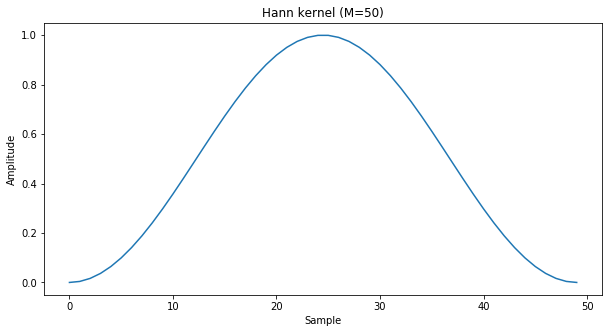

In [0]:
window_hann = ss.windows.hann(50)
fig = plt.subplots(figsize=(10, 5))
plt.plot(window_hann)
plt.title(r"Hann kernel (M=50)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

<Figure size 432x288 with 0 Axes>

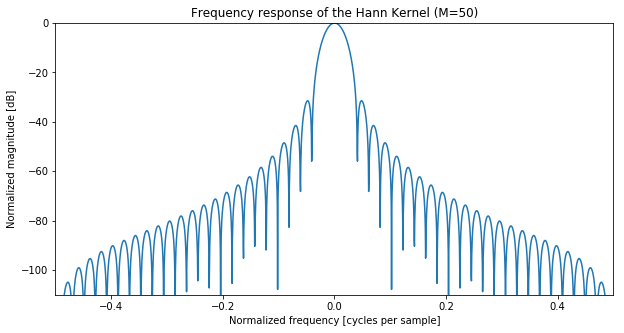

In [0]:
plt.figure()
fig = plt.subplots(figsize=(10, 5))
A = np.fft.fft(window_hann, 2048) / (len(window_hann)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(np.fft.fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -110, 0])
plt.title(r"Frequency response of the Hann Kernel (M=50)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.show()

Flattop function
--------------------

This function has this name because shape in Fourier space, FLATness on the  TOP of the main lobe. 

This function has the closed analytical form.

$K(n)=\sum_{i=0}^l \;a_i\;cos^i(\frac{2\pi\;n}{M})\quad 0\leq n \leq M$

In Python l=5 , 5th order cosene sum.

The negative values of this kernel emphasize transitions as in edges.

\\

More about Flattop function: 

D’Antona, Gabriele, and A. Ferrero, “Digital Signal Processing for Measurement Systems”, Springer Media, 2006, p. 70 DOI:10.1007/0-387-28666-7.
 
 Flattop function in Python: 
 
https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.signal.flattop.html#scipy.signal.flattop

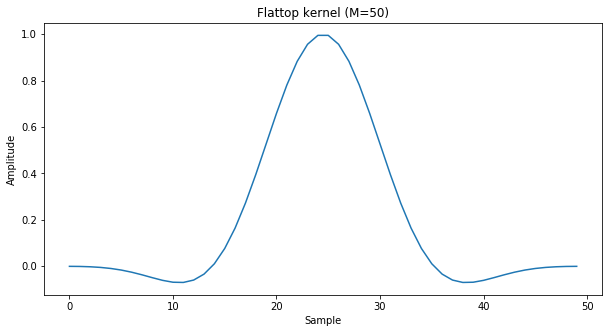

In [0]:
window_ft = ss.windows.flattop(50)
fig = plt.subplots(figsize=(10, 5))
plt.plot(window_ft)
plt.title(r"Flattop kernel (M=50)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

<Figure size 432x288 with 0 Axes>

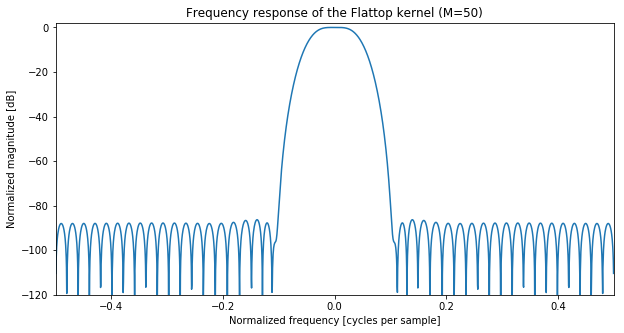

In [0]:
plt.figure()
fig = plt.subplots(figsize=(10, 5))
A = np.fft.fft(window_ft, 2048) / (len(window_ft)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(np.fft.fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 2])
plt.title(r"Frequency response of the Flattop kernel (M=50)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.show()

Adjustable Kernel
================

These kernels have aperture control parameters. In the Gaussian example, this parameter is the standard deviation ($\sigma$).



Gaussian Function
-----------

This function has the closed analytical form.

$K(n)=e^{-\frac{1}{2}(\frac{n-M/2}{\sigma M/2})^2} \quad 0\leq n \leq M$

Gaussian has many theoretical attractions, for example the Fourier transform of Gaussian kernel is Gaussian. This function has infity support and truncate Gaussian make high aliasing when compared with others kernels with same situation.

\\
 
Gaussian function (for signal) in Python: 
 
https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.signal.gaussian.html#scipy.signal.gaussian


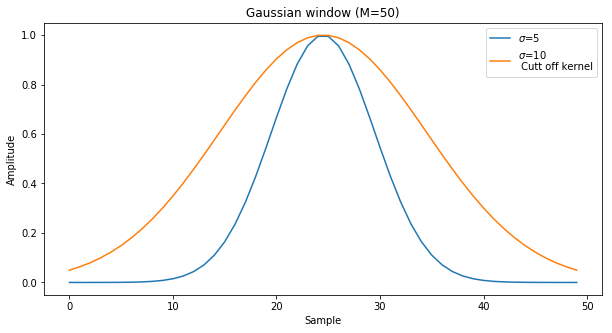

In [0]:

window_gaussian5 = ss.windows.gaussian(50, std=5)
window_gaussian10 = ss.windows.gaussian(50, std=10)

fig = plt.subplots(figsize=(10, 5))
plt.plot(window_gaussian5,label=r"$\sigma$=5")
plt.plot(window_gaussian10,label=r"$\sigma$=10"+"\n Cutt off kernel")
plt.title(r"Gaussian window (M=50)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.legend()
plt.show()



<Figure size 432x288 with 0 Axes>

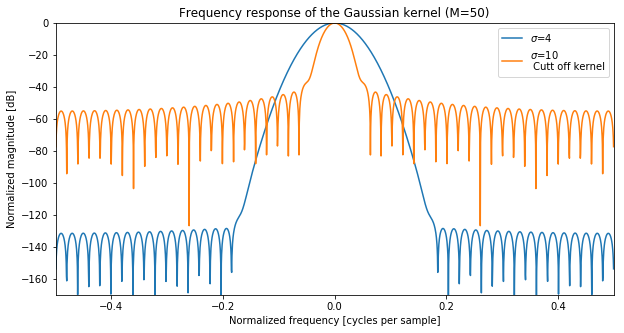

In [0]:
plt.figure()
fig = plt.subplots(figsize=(10, 5))
A = np.fft.fft(window_gaussian5, 2048) / (len(window_gaussian5)/2.0)
B = np.fft.fft(window_gaussian10, 2048) / (len(window_gaussian10)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response5 = 20 * np.log10(np.abs(np.fft.fftshift(A / abs(A).max())))
response10 = 20 * np.log10(np.abs(np.fft.fftshift(B / abs(B).max())))
plt.plot(freq, response5,label=r"$\sigma$=4")
plt.plot(freq, response10,label=r"$\sigma$=10"+"\n Cutt off kernel")
plt.axis([-0.5, 0.5, -170, 0])
plt.title(r"Frequency response of the Gaussian kernel (M=50)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.legend()
plt.show()

Slepian function
------------------------

DPSS (discrete prolate spheroidal sequence) or Slepian is the kernel that maximizes the energy concentration in the main lobe (in Fourier space).


This function no have closed analytical form.


More about Slepian function: 

D. Slepian & H. O. Pollak: “Prolate spheroidal wave functions, Fourier analysis and uncertainty-I,” Bell Syst. Tech. J., vol.40, pp.43-63, 1961. 

Slepian function in Python: 
 
https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.signal.slepian.html#scipy.signal.slepian


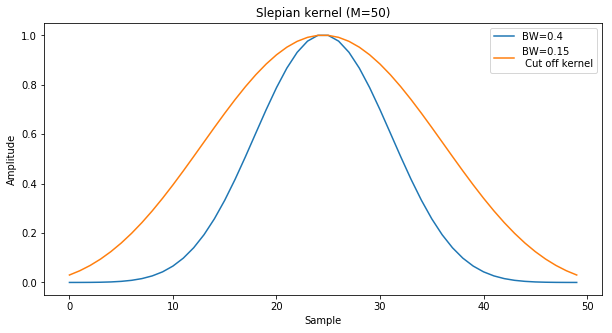

In [0]:
window_slepian_p4 = ss.windows.slepian(M=50,width=0.4)
window_slepian_p15 = ss.windows.slepian(M=50,width=0.15)


fig = plt.subplots(figsize=(10, 5))

plt.plot(window_slepian_p4,label="BW=0.4")
plt.plot(window_slepian_p15,label="BW=0.15"+'\n Cut off kernel')
plt.title(r"Slepian kernel (M=50)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.legend()
plt.show()



<Figure size 432x288 with 0 Axes>

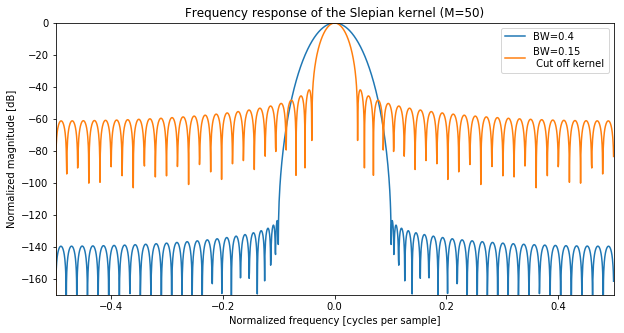

In [0]:
plt.figure()
fig = plt.subplots(figsize=(10, 5))
A = np.fft.fft(window_slepian_p4, 2048) / (len(window_slepian_p4)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
B = np.fft.fft(window_slepian_p15, 2048) / (len(window_slepian_p15)/2.0)
response_p5 = 20 * np.log10(np.abs(np.fft.fftshift(A / abs(A).max())))
response_p15 = 20 * np.log10(np.abs(np.fft.fftshift(B / abs(B).max())))
plt.plot(freq, response_p5,label="BW=0.4")
plt.plot(freq, response_p15,label="BW=0.15"+'\n Cut off kernel')
plt.axis([-0.5, 0.5, -170, 0])
plt.title(r"Frequency response of the Slepian kernel (M=50)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.legend()
plt.show()

Kernel fit using full width at half maximum (FWHM)
============================


The FWHM is used in several works of signal processes related to astronomy.


Below the example of signal, using a Dolph-Chebyshev window plus noise. 



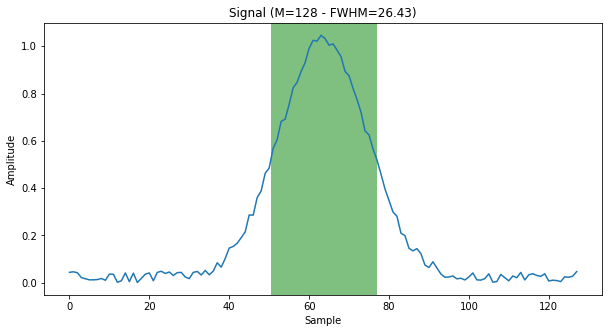

In [0]:
pdf = ss.windows.chebwin(M=128, at=300)+np.random.random_sample(128)/20
x = np.arange(128)

spline = sc.interpolate.UnivariateSpline(x, pdf-np.max(pdf)/2, s=0)
r1_pdf, r2_pdf = spline.roots() # find the roots

fig = plt.subplots(figsize=(10, 5))

plt.title(r"Signal (M=128 - FWHM="+str(np.round(np.abs(r1_pdf-r2_pdf),2))+")")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(x, pdf)
plt.axvspan(r1_pdf, r2_pdf, facecolor='g', alpha=0.5)
plt.show()

Gaussian
--------------

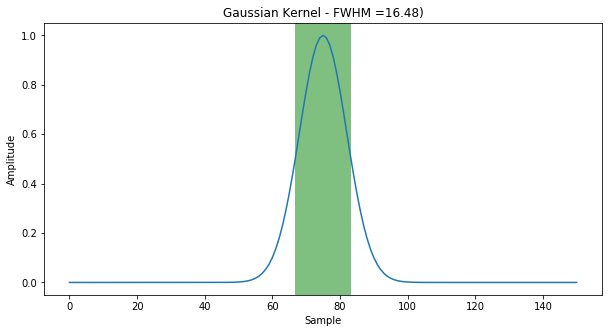

In [0]:
kernel_gauss = ss.windows.gaussian(151, std=7)
x_gauss = np.arange(151)
spline = sc.interpolate.UnivariateSpline(x_gauss, kernel_gauss-np.max(kernel_gauss)/2, s=0)
r1_gauss, r2_gauss = spline.roots() # find the roots

fig = plt.subplots(figsize=(10, 5))

plt.title(r"Gaussian Kernel - FWHM ="+str(np.round(np.abs(r1_gauss-r2_gauss),2))+")")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(x_gauss, kernel_gauss)
plt.axvspan(r1_gauss, r2_gauss, facecolor='g', alpha=0.5)
plt.show()

Slepian
------------

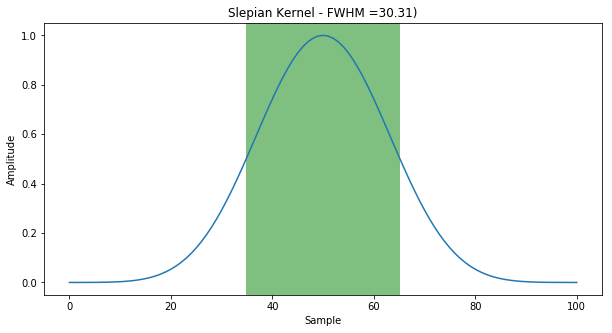

In [0]:
kernel_slepian = ss.windows.slepian(M=101, width=0.2)
x_sl = np.arange(101)
spline = sc.interpolate.UnivariateSpline(x_sl, kernel_slepian-np.max(kernel_slepian)/2, s=0)
r1_sl, r2_sl = spline.roots() # find the roots

fig = plt.subplots(figsize=(10, 5))

plt.title(r"Slepian Kernel - FWHM ="+str(np.round(np.abs(r1_sl-r2_sl),2))+")")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(x_sl, kernel_slepian)
plt.axvspan(r1_sl, r2_sl, facecolor='g', alpha=0.5)
plt.show()

Hann
------------

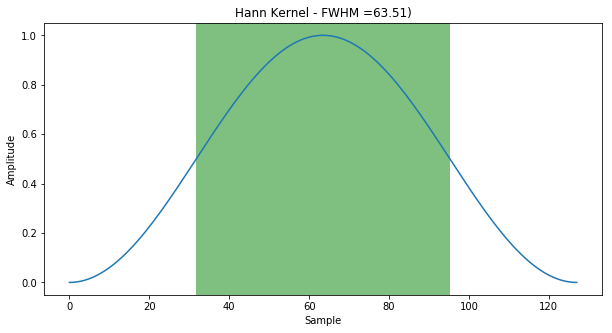

In [0]:
kernel_hann = ss.windows.hann(M=128)
x_hann = np.arange(128)
spline = sc.interpolate.UnivariateSpline(x_hann, kernel_hann-np.max(kernel_hann)/2, s=0)
r1_hann, r2_hann = spline.roots() # find the roots

fig = plt.subplots(figsize=(10, 5))

plt.title(r"Hann Kernel - FWHM ="+str(np.round(np.abs(r1_hann-r2_hann),2))+")")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(x_hann, kernel_hann)
plt.axvspan(r1_hann, r2_hann, facecolor='g', alpha=0.5)
plt.show()

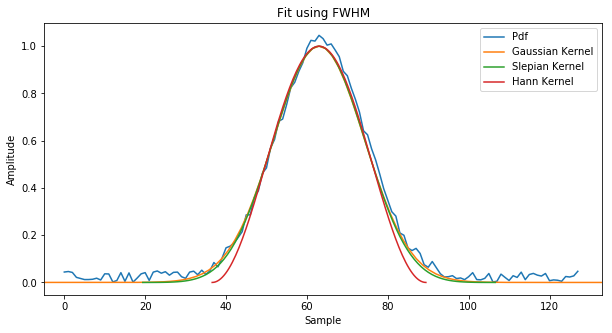

In [0]:
xx_g=(r2_pdf-r1_pdf)*x_gauss/(r2_gauss-r1_gauss)
xx_s=(r2_pdf-r1_pdf)*x_sl/(r2_sl-r1_sl)
xx_h=(r2_pdf-r1_pdf)*x_hann/(r2_hann-r1_hann)

fig = plt.subplots(figsize=(10, 5))

plt.plot(x,pdf,label='Pdf')
plt.plot(xx_g-xx_g.mean()+x.mean()-0.5, kernel_gauss,label='Gaussian Kernel')
plt.plot(xx_s-xx_s.mean()+x.mean()-0.5, kernel_slepian,label='Slepian Kernel')
plt.plot(xx_h-xx_h.mean()+x.mean()-0.5, kernel_hann,label='Hann Kernel')
plt.title('Fit using FWHM')
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.xlim(-5,133)
plt.legend()
plt.show()

Interpolation, zero padding and rotation matrix in PSF
======

In [0]:
def piecew(x,xi,yi):
  x_return=np.zeros(len(x))
  y_interp=sc.interpolate.interp1d(xi,yi,kind='cubic')
  for i in range(len(x)):
    if (x[i] < xi.min()):
      x_return[i]=0
    elif (x[i] > xi.max()):
      x_return[i]=0
    else:
      x_return[i]=y_interp(x[i])
  return x_return

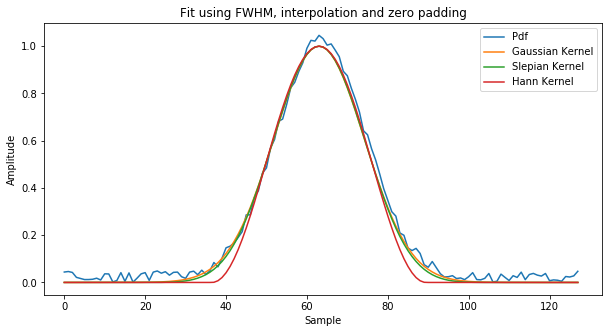

In [0]:
kernel_g_piecew=piecew(x,xx_g-xx_g.mean()+x.mean()-0.5,kernel_gauss)
kernel_s_piecew=piecew(x,xx_s-xx_s.mean()+x.mean()-0.5,kernel_slepian)
kernel_h_piecew=piecew(x,xx_h-xx_h.mean()+x.mean()-0.5,kernel_hann)

fig = plt.subplots(figsize=(10, 5))

plt.plot(x,pdf,label='Pdf')
plt.plot(x, kernel_g_piecew,label='Gaussian Kernel')
plt.plot(x, kernel_s_piecew,label='Slepian Kernel')
plt.plot(x, kernel_h_piecew,label='Hann Kernel')
plt.title('Fit using FWHM, interpolation and zero padding')
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.xlim(-5,133)
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

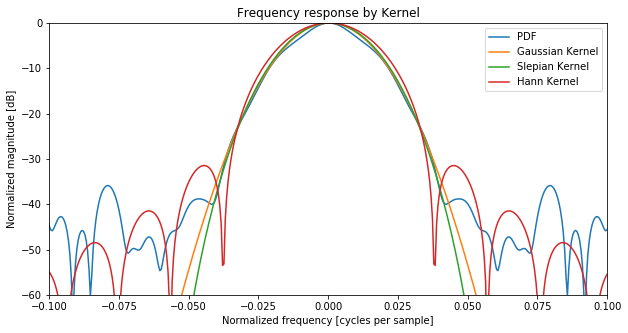

In [0]:
plt.figure()
####
A = np.fft.fft(pdf, 2048) / (len(pdf)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response_pdf = 20 * np.log10(np.abs(np.fft.fftshift(A / abs(A).max())))
#####
B = np.fft.fft(kernel_g_piecew, 2048) / (len(kernel_g_piecew)/2.0)
response_g = 20 * np.log10(np.abs(np.fft.fftshift(B / abs(B).max())))
#####
C = np.fft.fft(kernel_s_piecew, 2048) / (len(kernel_s_piecew)/2.0)
response_sl = 20 * np.log10(np.abs(np.fft.fftshift(C / abs(C).max())))
#####
D = np.fft.fft(kernel_h_piecew, 2048) / (len(kernel_h_piecew)/2.0)
response_hann = 20 * np.log10(np.abs(np.fft.fftshift(D / abs(D).max())))

fig = plt.subplots(figsize=(10, 5))

plt.plot(freq, response_pdf,label='PDF')
plt.plot(freq, response_g,label='Gaussian Kernel')
plt.plot(freq, response_sl,label='Slepian Kernel')
plt.plot(freq, response_hann,label='Hann Kernel')
plt.axis([-0.1, 0.1, -60, 0])

plt.title(r"Frequency response by Kernel")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.legend(loc='upper right')
plt.show()

Two-dimensional symmetric kernel using one-dimensional kernel
============

Description

In [0]:
def psf_grid(psf):
  
    psf_slice = tuple([slice(0, psf.shape[0]),slice(0, psf.shape[1])])

    psf_centre = np.asarray(psf[psf_slice]/np.max(psf[psf_slice]))

    max_location = np.unravel_index(np.argmax(psf_centre), psf_centre.shape)

    x = np.arange(-max_location[1],-max_location[1]+psf_centre.shape[1],1)
    y = np.arange(-max_location[0],-max_location[0]+psf_centre.shape[0],1)


    return np.meshgrid(x,-y)

In [0]:
l=256
psf=np.zeros((l,l))
psf[l//2,l//2]=1
xy_grid=np.array(psf_grid(psf)).reshape(2,l*l).T
xy_grid

array([[-128,  128],
       [-127,  128],
       [-126,  128],
       ...,
       [ 125, -127],
       [ 126, -127],
       [ 127, -127]])

In [0]:
r=[]
for i in xy_grid:
  r.append((i[0]**2+i[1]**2)**(0.5))
r=np.array(r)

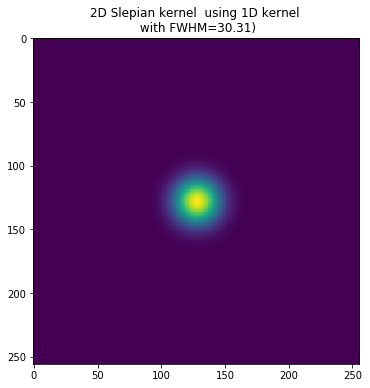

In [0]:
psf_slep=piecew(r,x_sl-x_sl.mean()-0.5,kernel_slepian).reshape(l,l)
psf_slep=psf_slep/psf_slep.max()

fig = plt.subplots(figsize=(6, 6))
plt.imshow(psf_slep)
#plt.axis('off')
plt.title('2D Slepian kernel  using 1D kernel \n with FWHM='+str(np.round(np.abs(r1_sl-r2_sl),2))+")")
plt.show()

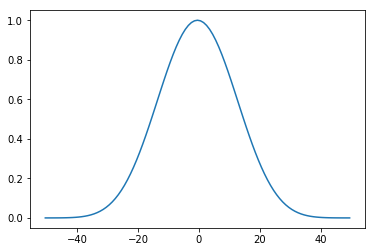

In [0]:
plt.plot(x_sl-x_sl.mean()-0.5,kernel_slepian)

In [0]:
Image(url= "https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_images/sn_rec_gauss.png")

Deconvolution using Clean ( Hogbon ) and MultiScale Clean ( Cornwell )
=============

Problem:


Image dirty=PSF*Image real+noise, where  * is Convolution
--------

Using Math

$I_D=B*I_{Real}+\sigma$
---------------

Hogbon Solution:
--------

$I_R=$Image residual

$I_M=$Image Model

$g=$ Clean gain or loop gain;

$niter=$ Number of interaction

$threshold=$ threshold of noise

For i=0:

$I_R^0=I_D$

$I_M^0=0$

While  i<niter and max(I_R)< Tre:

        1 - location of peak residual $(x_q,y_q)$;

        2 - Add this component to current model, scaled by loop gain;

        3 - Remove the scaled component of I_R, using B centering of $(x_q,y_q)$;

After stop

$I_{Restored}=Kernel*I_M+I_R$

Firt Kernel used was truncad PSF;




Cornwell Solution:
--------

Similar the Hogbon, but MultiScale;


![salt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/MS_Clean.png)




Image Quality
=======

Dynamic Range:
--------------
$DR=\frac{max(restored\;image)}{RMS error}$
------

$RMS error= \sqrt{\frac{(\sum: residual\; image^2)}{(\sum: number of pixels )}}$


Visual SNR
-------------
$SNR =20 \log_{10}( \frac{|model\;sky|_2}{(|restored\;image-model\;sky|_2)})$



Results Simulation M31 - Loop Gain 0.3.
========

Image Model ($I_M$)   left side, and    Image Residual ($I_R$) on right side:

Loop gain = 0.3

![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/model_residual_M31_p3.png)

Gaussian Numeric
-------


![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/study_Gaussian_restored_M31_p3.png)

Flattop
---------

![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/study_Flattop_restored_M31_p3.png)

Results Simulation M31 - Loop Gain 0.075.
========

Image Model ($I_M$)   left side, and    Image Residual ($I_R$) on right side:


![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/model_residual_M31_p075.png)

Gaussian Numeric
-------


![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/study_Gaussian_restored_M31_p75.png)

Flattop
---------

![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/study_Flattop_restored_M31_p075.png)

Real Data - Hogbon vs MS Clean
-----------------------

Clean Hogbom - niter = 1k - Gaussian Window
---------

![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/study_Gaussian_restored_SN_1k.png)

Clean Hogbom - niter = 10k - Gaussian Window
---------

![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/study_Gaussian_restored_SN_10k.png)

MS Clean  - niter = 1k - Gaussian Window
---------

![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/study_Gaussian_restored_SN_1k_ms.png)

MS Clean  - niter = 1k - Flattop Window
---------

![alt text](https://raw.githubusercontent.com/rgiostri/X.ECFA.UFES.Blur.function/master/sample_mages/study_Flattop_restored_SN_1k_SN.png)